# K-means

In [1]:
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
# Let's try to find blob centers and assign each instance to the closest blob using K-means
X, y = make_blobs(random_state=42)

k = 3
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X)

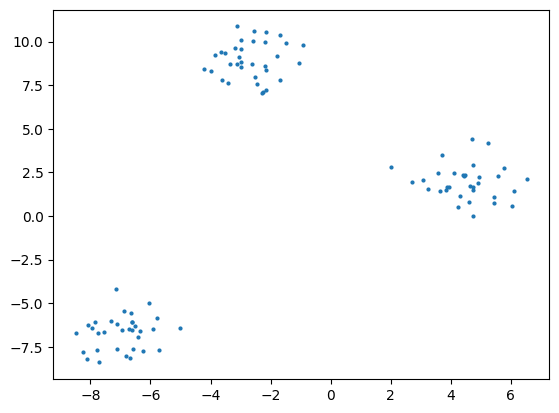

In [3]:
import matplotlib.pyplot as plt

X1 = X[:, 0]
X2 = X[:, 1]
plt.scatter(X1, X2, s=4)

In [4]:
from sklearn.metrics import accuracy_score, f1_score

accuracy_score(y, y_pred), f1_score(y, y_pred, average="weighted")

(0.34, 0.34)

In [5]:
y_pred is kmeans.labels_

True

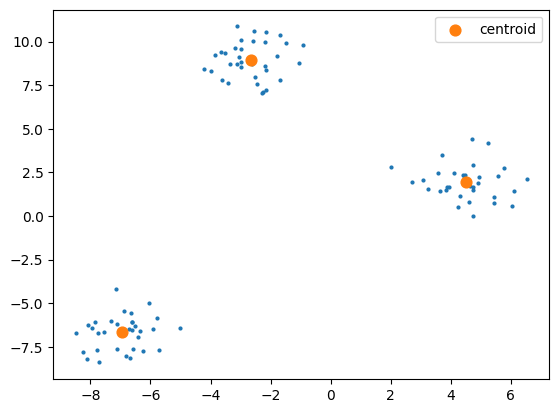

In [6]:
# plot centroids
plt.scatter(X1, X2, s=4)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60, label="centroid")
plt.legend()

In [7]:
# KMeans class transform() method measures the distance from each instance to every centroid
X_new, y_new = make_blobs(random_state=54, n_samples=4)

kmeans.transform(X_new).round(2)

array([[ 6.51, 16.39, 15.64],
       [ 9.74,  6.48, 10.46],
       [13.35,  4.5 ,  9.88],
       [11.07,  7.59,  6.74]])

In [8]:
# Init the centroids manually (if you know where they should be)
good_init = np.array([[-3, 3], [-3, 2], [-3, 1]])
kmeans = KMeans(n_clusters=3, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1]]), n_clusters=3,
       n_init=1, random_state=42)

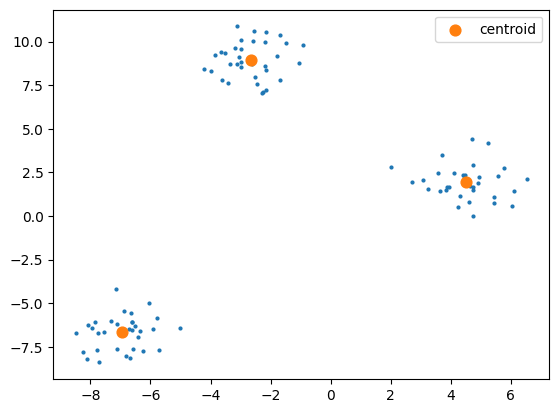

In [9]:
plt.scatter(X1, X2, s=4)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60, label="centroid")
plt.legend()

In [10]:
kmeans.inertia_

171.91098459057724

In [11]:
kmeans.score(X)

-171.91098459057727

In [12]:
# If huge dataset, use MiniBatchKMeans
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [13]:
# Silhouette score
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

np.float64(0.8469881221532085)

# DBSCAN (Density Based Spatial Clustering of Applications with Noise)

In [14]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [15]:
# Get the labels of the labeled instances
dbscan.labels_[:8] # Some labels are equal to -1 which means they are anomalies

array([0, 1, 2, 3, 1, 0, 2, 0])

In [16]:
dbscan.core_sample_indices_[:8] # Indices of the core instances

array([0, 1, 2, 3, 4, 5, 6, 7])

In [18]:
dbscan_20 = DBSCAN(eps=0.20, min_samples=5)
dbscan_20.fit(X)

DBSCAN(eps=0.2)

Text(0.5, 1.0, 'eps=0.2')

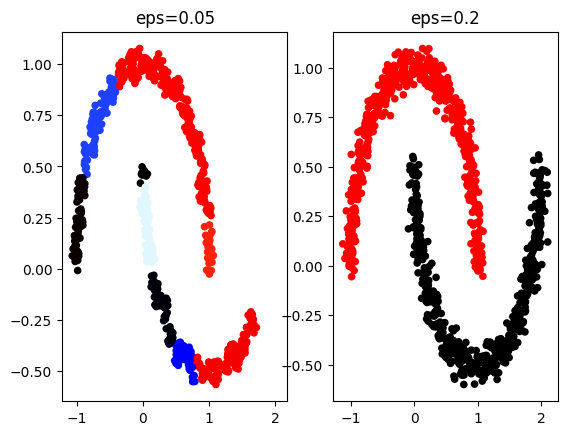

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].scatter(dbscan.components_[:, 0], dbscan.components_[:, 1], s=20, c=dbscan.labels_[dbscan.core_sample_indices_], cmap="flag") # Core instances themselves
ax[0].set_title("eps=0.05")
ax[1].scatter(dbscan_20.components_[:, 0], dbscan_20.components_[:, 1], s=20, c=dbscan_20.labels_[dbscan_20.core_sample_indices_], cmap="flag") # Core instances themselves
ax[1].set_title("eps=0.2")

In [20]:
# DBSCAN cannot predict on new instances (no predict(), just fit_predict()) so let's try implement it with KNeighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan_20.components_, dbscan_20.labels_)

KNeighborsClassifier(n_neighbors=50)

In [21]:
# Create new instances
X_new = np.random.randint(-100, 100, (15, 2)) / 100
X_new[:5]

array([[-0.98, -0.91],
       [ 0.55, -0.88],
       [ 0.67, -0.94],
       [ 0.01, -0.28],
       [-0.89,  0.65]])

In [22]:
# Predict
knn.predict(X_new)

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [23]:
# Predict probabilities
knn.predict_proba(X_new)[:5]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [24]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan_20.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1, -1, -1,  1,  1, -1,  0,  1, -1, -1,  0, -1,  1,  0, -1])

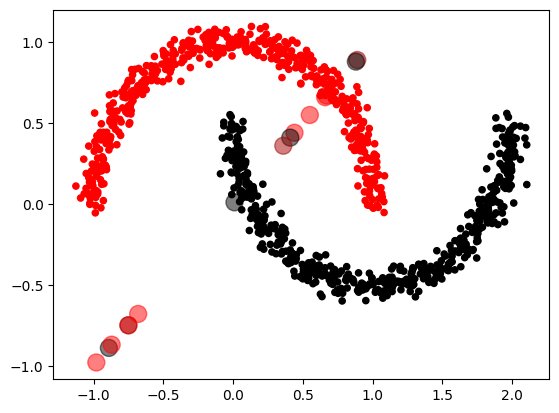

In [25]:
plt.scatter(dbscan_20.components_[:, 0], dbscan_20.components_[:, 1], s=20, c=dbscan_20.labels_[dbscan_20.core_sample_indices_], cmap="flag")
plt.scatter(X_new[:, 0], X_new[:, 0], c=y_pred.ravel(), s=150, cmap="flag", alpha=0.5)

# Other Clustering Algorithms

* Agglomerative clustering

* BIRCH

* Mean-shift

* Affinity propagation

* Spectral clustering

In [26]:
# Gaussian Mixtures (better for ellipsoid looking clusters)
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2, n_init=10) # better set n_init, because it is 1 by default (it needs to be run several times)
gm.fit(X)

GaussianMixture(n_components=2, n_init=10)

In [27]:
# Let's look at the parameters that the GaussianMixture estimated

In [28]:
gm.weights_

array([0.50852584, 0.49147416])

In [29]:
gm.means_

array([[-0.12270828,  0.6316461 ],
       [ 1.1438316 , -0.14474113]])

In [30]:
gm.covariances_

array([[[0.35787136, 0.05129795],
        [0.05129795, 0.09980044]],

       [[0.3459505 , 0.05621367],
        [0.05621367, 0.09736192]]])

In [31]:
gm.converged_, gm.n_iter_

(True, 5)

In [32]:
# Use predict() for hard clustering or predict_proba() for soft clustering
y_gm_preds = gm.predict(X)

In [33]:
y_gm_prob_preds = gm.predict_proba(X).round(3)
y_gm_prob_preds[:5]

array([[0.91 , 0.09 ],
       [0.017, 0.983],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.17 , 0.83 ]])

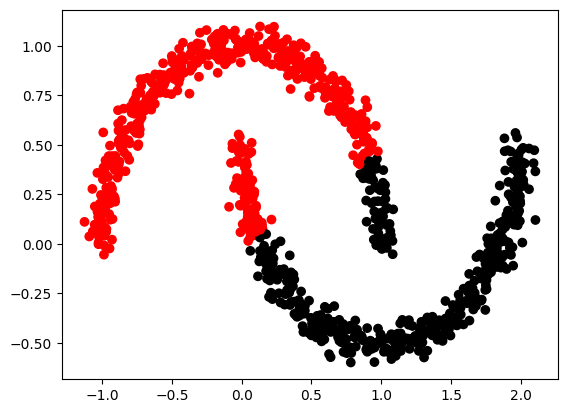

In [34]:
plt.scatter(X[:, 0], X[:, 1], c=y_gm_preds, cmap="flag")

In [35]:
X_new, y_new = gm.sample(6) # generate random samples

In [36]:
# Check the density (the more the higher density)
gm.score_samples(X).round(2)[:5]

array([-2.05, -1.72, -1.57, -1.85, -2.28])

In [37]:
# Detect anomalies with Gaussian Mixture model
# Anomalies might have low density, so let's set threshold for low-density
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 2)
anomalies = X[densities < density_threshold]

In [38]:
density_threshold, anomalies[:3]

(np.float64(-3.0071479311628364),
 array([[ 1.88302871,  0.53231017],
        [ 1.90779126,  0.47217941],
        [-0.98437265,  0.04045644]]))

In [39]:
# BIC and AIC (lower is better) adjust with number of clusters...
gm.bic(X), gm.aic(X)

(np.float64(3508.60344356913), np.float64(3454.6181355003264))

In [40]:
X, y = make_blobs(random_state=42)

In [41]:
# To get rid of the unnecessary clusters automatically use BayesianGaussianMixture(give it more clusters than normal)
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
weights = bgm.weights_.round(2)
print(f"Optimal Number of Clusters is: {len([i for i in weights if i > 0])}") # Get only more than 0 values

Optimal Number of Clusters is: 3


In [42]:
gm8 = GaussianMixture(n_components=3, n_init=10) # better set n_init, because it is 1 by default (it needs to be run several times)
gm8.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [43]:
gm8.bic(X), gm8.aic(X)

(np.float64(829.7842161613024), np.float64(785.4963229995049))

# 10.

In [46]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [49]:
X_faces = faces.data
y_faces = faces.target

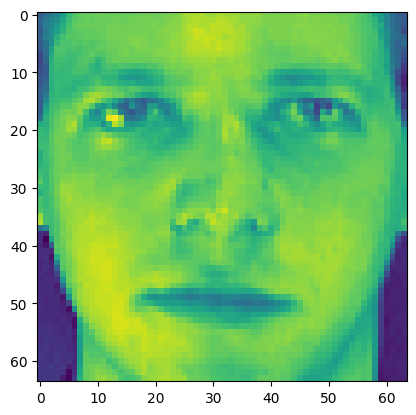

In [78]:
plt.imshow(X_faces[0].reshape(64, 64))

In [88]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(test_size=0.1)

splits = []

for train_indecies, test_indecies in sss.split(X_faces, y_faces):
  X_train_faces, y_train_faces = X_faces[train_indecies], y_faces[train_indecies]
  X_test_faces, y_test_faces = X_faces[test_indecies], y_faces[test_indecies]
  splits.append((X_train_faces, y_train_faces, X_test_faces, y_test_faces))

In [96]:
X_faces_train, y_faces_train = splits[0][0], splits[0][1]
X_faces_test, y_faces_test = splits[0][2], splits[0][3]

In [98]:
len(X_faces_train), len(X_faces_test)

(360, 40)

In [99]:
X_faces_validation = X_faces_train[300:]
X_faces_train = X_faces_train[:300]

In [100]:
len(X_faces_train), len(X_faces_validation)

(300, 60)

In [101]:
y_faces_validation = y_faces_train[300:]
y_faces_train = y_faces_train[:300]

In [102]:
len(y_faces_train), len(y_faces_validation)

(300, 60)

In [111]:
kmeans_faces = KMeans(n_clusters=30)
kmeans_faces.fit(X_faces_train)

KMeans(n_clusters=30)

In [112]:
y_faces_train

array([20, 24,  5, 19, 15, 39, 34, 29, 38, 23, 23, 18, 33, 13, 21, 26,  1,
       27, 26,  7, 15, 30, 27,  4, 35, 18, 28, 11,  6, 15, 14, 38, 20, 17,
       21,  5,  8, 13, 13, 25, 18,  0, 16, 35, 29, 21,  5,  6, 27,  0,  3,
       39, 22, 39, 30, 38,  3, 32, 20, 12,  1,  7, 30, 29, 20, 32, 31, 12,
       28, 22, 37, 29, 21, 20, 14,  9, 37, 28,  6,  8,  6, 35,  8,  4, 32,
       26, 27, 18, 16, 39, 12, 36, 16, 37, 22,  4, 14, 10, 38, 11, 27, 25,
       16, 24, 12,  6, 38, 26, 10, 25,  2,  1, 32, 31, 13,  7,  2, 36, 15,
        7, 20, 33,  5, 11,  3, 23, 17,  8, 16, 34, 25, 19, 33,  1, 26, 17,
        1,  5, 26, 22, 15, 11,  9, 39,  1, 38, 21, 17,  0, 25, 36, 20, 30,
       25, 27, 19, 14, 19, 37, 24,  0, 33, 23, 23,  0, 21, 10, 36,  4, 21,
       22,  0, 34, 18, 14, 31, 30, 11, 36, 30,  2,  3, 37, 11,  1, 28,  4,
       12, 35,  8, 34,  4,  5, 24, 13, 23, 11,  5, 17, 14, 25, 28, 33,  2,
       13, 27, 38, 20,  6, 35,  5, 34, 36,  7, 30,  0, 34,  5, 28,  2, 25,
       16, 19, 23, 36, 13

In [113]:
silhouette_score(X_faces_train, kmeans_faces.labels_)

np.float32(0.12367605)

In [345]:
def silhouette_plot(max_cl, X, min_cl=2):
  clusters = [i for i in range(min_cl, max_cl + 1)]
  sil_s = []
  for i in range(min_cl, max_cl + 1):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    sil_s.append(silhouette_score(X, kmeans.labels_))
  plt.plot(clusters, sil_s)

In [342]:
def inertia_plot(max_cl, X, min_cl=2):
  clusters = [i for i in range(min_cl, max_cl + 1)]
  inertia = []
  for i in range(min_cl, max_cl + 1):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
  plt.plot(clusters, inertia)

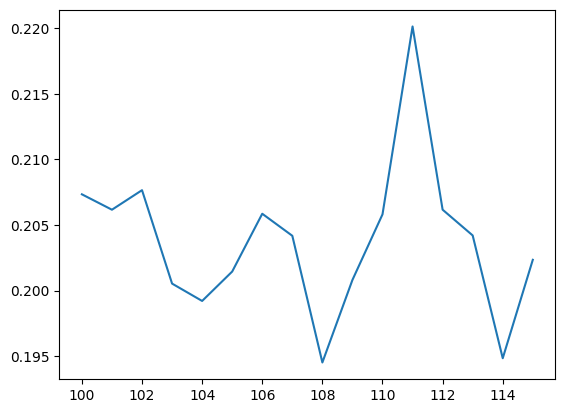

In [372]:
silhouette_plot(min_cl=100, max_cl=115, X=X_faces_train)

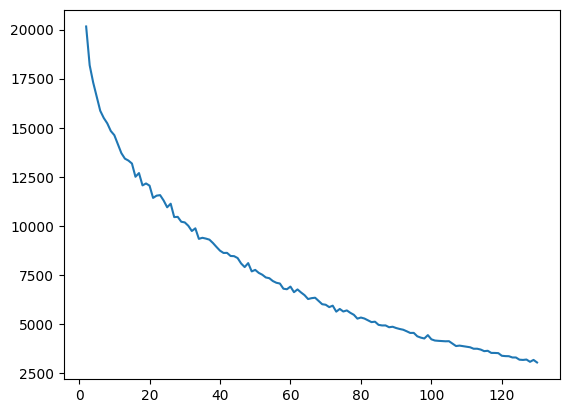

In [348]:
inertia_plot(max_cl=130, X=X_faces_train)

In [373]:
# Ok let's take 111
kmeans_faces = KMeans(n_init=10, n_clusters=111)

kmeans_faces.fit(X_faces_train)

KMeans(n_clusters=111, n_init=10)

In [387]:
def plot_the_faces(faces, labels, label):
  label_idx = []
  for i in range(len(labels)):
    if labels[i] == label:
      label_idx.append(i)
  if len(label_idx) <= 1:
    return None
  fig, ax = plt.subplots(nrows=1, ncols=len(label_idx), figsize=(4, 4))
  for i in range(len(label_idx)):
    ax[i].imshow(faces[label_idx[i]].reshape(64, 64))
    ax[i].set_title(label)
    ax[i].axis("off")

In [205]:
len(kmeans_faces.labels_)

300

In [389]:
# for i in range(100):
#   plot_the_faces(X_train_faces, kmeans_faces.labels_, i)

# 11.

In [459]:
# Train a classifier for faces
from sklearn.svm import SVC

svc_faces = SVC()

svc_faces.fit(X_faces_train, y_faces_train)

SVC()

In [460]:
svc_faces.score(X_faces_validation, y_faces_validation)

0.85

In [467]:
# Dim reduction
X_faces_train_reduced = kmeans_faces.transform(X_faces_train)
X_faces_validation_reduced = kmeans_faces.transform(X_faces_validation)

In [468]:
svc_reduced = SVC()

svc_reduced.fit(X_faces_train_reduced, y_faces_train)

SVC()

In [469]:
svc_reduced.score(X_faces_validation_reduced, y_faces_validation)

0.5

In [488]:
X_faces_validation.shape, X_faces_train.shape

((60, 4096), (300, 4096))

In [546]:
# Find the best kmeans for transformation
from sklearn.pipeline import make_pipeline

pca = PCA(0.99)

X_reduced = pca.fit_transform(X_faces_train)
X_val_reduced = pca.transform(X_faces_validation)

for i in range(5, 141, 5):
  kmeans = KMeans(n_clusters=i, n_init=10)
  kmeans.fit(X_reduced)
  X = kmeans.transform(X_reduced)
  X_v = kmeans.transform(X_val_reduced)
  svc = SVC()
  svc.fit(X, y_faces_train)
  print(f"{i}: {svc.score(X_v, y_faces_validation)}")

5: 0.18333333333333332
10: 0.2
15: 0.26666666666666666
20: 0.2833333333333333
25: 0.2833333333333333
30: 0.3333333333333333
35: 0.35
40: 0.31666666666666665
45: 0.38333333333333336
50: 0.4
55: 0.43333333333333335
60: 0.48333333333333334
65: 0.45
70: 0.5166666666666667
75: 0.5
80: 0.5
85: 0.45
90: 0.48333333333333334
95: 0.5
100: 0.48333333333333334
105: 0.4666666666666667
110: 0.4666666666666667
115: 0.43333333333333335
120: 0.5166666666666667
125: 0.4666666666666667
130: 0.4666666666666667
135: 0.43333333333333335
140: 0.48333333333333334


In [547]:
# Add transformed X to original X
X_faces_train_combined = np.c_[X_faces_train, X_reduced]
X_faces_validation_combined = np.c_[X_faces_validation, X_val_reduced]

In [548]:
svc_combined = SVC()

svc_combined.fit(X_faces_train_combined, y_faces_train)

SVC()

In [549]:
svc_combined.score(X_faces_validation_combined, y_faces_validation)

0.85

# 12.

In [550]:
from sklearn.mixture import GaussianMixture

gaus_mix = GaussianMixture(n_init=10)

gaus_mix.fit(X_reduced)

GaussianMixture(n_init=10)

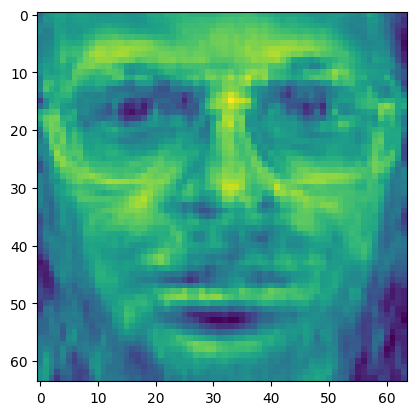

In [574]:
# Let's generate some faces
new_face = gaus_mix.sample(1)[0][0]
new_face = pca.inverse_transform(new_face).reshape(64, 64)
plt.imshow(new_face)

## Check for anomalies recognition

In [615]:
normal_images = X_val_reduced[:10]
anomalies = pca.inverse_transform(X_val_reduced[50:])

In [616]:
anomalies[0].shape

(4096,)

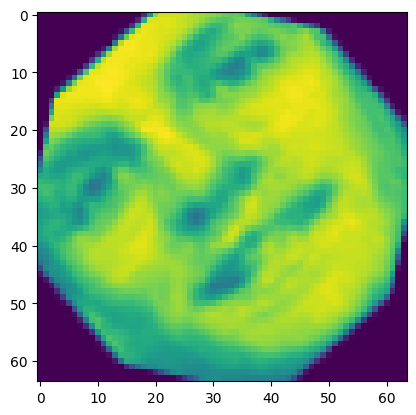

In [628]:
plt.imshow(skimage.transform.rotate(anomalies[0].reshape(64, 64), angle=np.random.randint(-80, 80)))

In [617]:
import skimage

for i in range(len(anomalies)):
  anomalies[i] = skimage.transform.rotate(anomalies[i].reshape(64, 64), angle=np.random.randint(-80, 80)).reshape(-1,)

anomalies_pca = pca.transform(anomalies)

In [619]:
gaus_mix.score_samples(anomalies_pca)

array([-313.33207626, -423.62215328, -306.80728893, -163.15129514,
       -263.35696836, -103.40458836, -359.00035881, -170.53406247,
       -158.61711745, -356.50125177])

In [621]:
gaus_mix.score_samples(normal_images)

array([ -1.73847843, -46.56776379, -31.58376963,  -4.80678363,
       -22.63809529, -24.58960234, -32.41541873, -59.13044138,
         5.73383051, -11.36498085])

# 13.

In [624]:
# Check reconstruction error after PCA
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=-1)
    return mse

np.mean(reconstruction_errors(pca, X_faces_train))

np.float32(0.00019305521)

In [625]:
np.mean(reconstruction_errors(pca, anomalies))

np.float32(0.009344928)

In [679]:
dict(enumerate(anomalies))

{0: array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 1: array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 2: array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 3: array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 4: array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 5: array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 6: array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 7: array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 8: array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 9: array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)}

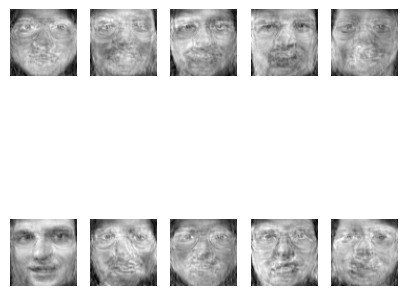

In [693]:
# Plot the attempts of pca to inverse_transform() anomalies
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(5, 5))

inversed_anomalies = pca.inverse_transform(anomalies_pca)

for i in range(len(anomalies)):
  row = i // 5
  col = i % 5
  ax[row, col].imshow(inversed_anomalies[i].reshape(64, 64), cmap="gray")
  ax[row, col].axis(False)